### Performing EDA and Data preparation

df1: New York AirBnb raw data
df2: Clark County Airbnb raw data (Not implemented)
df_merged: Merged df of All airbnb raw data 

host_df: Df with columns relating to host

In [214]:
# %pip install glob sns np openpyxl numpy pandas

In [215]:
#import required librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [216]:
df1 = pd.read_csv("./new_york.csv")
df1 = df1.sample(frac=0.3, random_state=42)
df1['city'] = 'New York'
data = [df1]
df_merged = pd.concat(data, ignore_index=True, sort=False)
df_merged.shape

(11836, 76)

In [217]:
df_merged.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

df_merged = pd.concat(data, ignore_index=True, sort=False)
host_df = df_merged[[
    'host_id','host_since','host_verifications','host_total_listings_count','host_is_superhost',
    'host_response_rate','neighbourhood'
]].drop_duplicates(subset='host_id', keep='first')
host_df.to_csv('host_data.csv')

In [218]:
df_merged = pd.concat(data, ignore_index=True, sort=False)
# Clear and show data
df_merged = df_merged[['id', 'name', 'host_id', 
         'latitude', 'longitude', 'property_type', 'picture_url', 'room_type', 'neighbourhood', 'accommodates', 'bathrooms_text', 
         'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews','review_scores_rating', 
        'host_identity_verified', 'host_is_superhost', 'host_response_rate', 'host_response_time', 'city']]
print(df_merged.shape)
df_merged.head(1)

(11836, 22)


,id,name,host_id,latitude,longitude,property_type,picture_url,room_type,neighbourhood,accommodates,...,beds,amenities,price,number_of_reviews,review_scores_rating,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,city
0,16650612,Rental unit in New York · ★4.83 · Studio · 1 b...,24805629,40.76283,-73.98718,Entire rental unit,https://a0.muscache.com/pictures/99ebfaf5-92cf...,Entire home/apt,"New York, United States",2,...,1.0,"[""Heating"", ""Wifi"", ""Kitchen"", ""Essentials"", ""...",$170.00,6,4.83,t,f,NaN,NaN,New York


In [219]:
# Calculate missing percentage
n_rows, n_cols = df_merged.shape
print("%-25s%s" % ("Variable Name", "Missing Percentage"))
print("-" * 43)
print(100 - 100 * df_merged.count() / n_rows)

Variable Name            Missing Percentage
-------------------------------------------
id                         0.000000
name                       0.000000
host_id                    0.000000
latitude                   0.000000
longitude                  0.000000
property_type              0.000000
picture_url                0.000000
room_type                  0.000000
neighbourhood             41.872254
accommodates               0.000000
bathrooms_text             0.109834
bedrooms                  42.979047
beds                       1.630618
amenities                  0.000000
price                      0.000000
number_of_reviews          0.000000
review_scores_rating      26.123690
host_identity_verified     0.016898
host_is_superhost          1.410950
host_response_rate        33.507942
host_response_time        33.507942
city                       0.000000
dtype: float64


### Bedrooms, host_response_time, neighbourhood, bedrooms, review_scores_rating have high percentages of missing values. Need to evaluate individually.

In [220]:
# Property types and count of datas with empty values for 'bedrooms'
df_merged[df_merged['bedrooms'].isnull()][['id','property_type','bedrooms']].groupby('property_type').count().sort_values('id', ascending=False)

,id,bedrooms
property_type,,
Private room in rental unit,2684,0
Entire rental unit,771,0
Private room in home,696,0
Private room in townhouse,318,0
Private room in condo,160,0
Shared room in rental unit,121,0
Entire condo,43,0
Private room in guest suite,32,0
Entire loft,30,0


In [221]:
# Some of the property types have missing values for bedrooms but its value can be inferred through property_type.
property_counts = df_merged[['id','property_type','bedrooms']].groupby('property_type').count().sort_values('id', ascending=False)
property_counts
# Difference between id and bedrooms is due to the missing values in bedrooms for the respective property_types
# Property types such as tiny home has only 8 properties, out of the 39k rows, so we choose to remove

,id,bedrooms
property_type,,
Entire rental unit,4994,4223
Private room in rental unit,3078,394
Private room in home,755,59
Entire home,495,478
Entire condo,380,337
Private room in townhouse,346,28
Room in hotel,303,288
Entire serviced apartment,212,189
Private room in condo,178,18


In [222]:
property_exclude = property_counts[property_counts['id'] < 10]
print('No. of properties types to be excluded: ' + str(len(property_exclude)))
print('Before excluding: ', df_merged.shape[0])
filtered_df = df_merged[~df_merged['property_type'].isin(property_exclude.index.values)]
print('After excluding: ', filtered_df.shape[0])
print('Rows deleted: ', df_merged.shape[0] - filtered_df.shape[0])

No. of properties types to be excluded: 26
Before excluding:  11836
After excluding:  11767
Rows deleted:  69


In [223]:
# Convert bathrooms_text into numeric
filtered_df['bathrooms_text']
filtered_df['bathrooms'] = filtered_df['bathrooms_text'].str.extract(r'([\d.]+)\s')
filtered_df['bathrooms'] = pd.to_numeric(filtered_df['bathrooms'])
# Ensure no. of bathrooms is extracted properly before dropping
filtered_df[['bathrooms_text','bathrooms']]

C:\Users\Edwin Chong\AppData\Local\Temp\ipykernel_6612\2293365014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bathrooms'] = filtered_df['bathrooms_text'].str.extract(r'([\d.]+)\s')
C:\Users\Edwin Chong\AppData\Local\Temp\ipykernel_6612\2293365014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bathrooms'] = pd.to_numeric(filtered_df['bathrooms'])


,bathrooms_text,bathrooms
0,1 bath,1.0
1,1 bath,1.0
2,1 bath,1.0
3,1 bath,1.0
4,1 shared bath,1.0
...,...,...
11831,2 baths,2.0
11832,1 shared bath,1.0
11833,2.5 baths,2.5
11834,1 bath,1.0


In [224]:
# Replace missing values by the median values of their property_type, if no median, use 1
medians = filtered_df.groupby('property_type')[['bedrooms','beds','bathrooms']].transform('median')
medians
filtered_df[['bedrooms','beds','bathrooms']] = filtered_df[['bedrooms','beds','bathrooms']].fillna(medians.fillna(1))
filtered_df[['bedrooms','beds','bathrooms']]

C:\Users\Edwin Chong\AppData\Local\Temp\ipykernel_6612\2347434488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['bedrooms','beds','bathrooms']] = filtered_df[['bedrooms','beds','bathrooms']].fillna(medians.fillna(1))


,bedrooms,beds,bathrooms
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,2.0,2.0,1.0
4,1.0,1.0,1.0
...,...,...,...
11831,2.0,4.0,2.0
11832,1.0,1.0,1.0
11833,2.0,2.0,2.5
11834,2.0,2.0,1.0


In [225]:
# Remove columns deemed unnecessary

# Bathrooms_text replaced by bathrooms
filtered_df = filtered_df.drop('bathrooms_text', axis=1)

# Information provided by 'neighbourhood' can also be taken out since we have latitute and longitude data
filtered_df = filtered_df.drop('neighbourhood', axis=1)

# Missing values in review_scores_rating is due to listing having no reviews
filtered_df['review_scores_rating'] = filtered_df['review_scores_rating'].fillna('No reviews')

In [226]:
# Check to see if there are still missing data
round((filtered_df.isnull().sum() / filtered_df.shape[0]) *100,2)

id                         0.00
name                       0.00
host_id                    0.00
latitude                   0.00
longitude                  0.00
property_type              0.00
picture_url                0.00
room_type                  0.00
accommodates               0.00
bedrooms                   0.00
beds                       0.00
amenities                  0.00
price                      0.00
number_of_reviews          0.00
review_scores_rating       0.00
host_identity_verified     0.02
host_is_superhost          1.42
host_response_rate        33.53
host_response_time        33.53
city                       0.00
bathrooms                  0.00
dtype: float64

In [227]:
filtered_df.dropna(subset=['host_identity_verified', 'host_is_superhost'], inplace=True)

In [228]:
print('Before preprocessing: ', df_merged.shape)
print('After preprocessing: ', filtered_df.shape)
print('Rows deleted: ', df_merged.shape[0] - filtered_df.shape[0])
print('Columns deleted: ', df_merged.shape[1] - filtered_df.shape[1])

Before preprocessing:  (11836, 22)
After preprocessing:  (11598, 21)
Rows deleted:  238
Columns deleted:  1


# Removing outliers

In [229]:
df_merged = filtered_df.copy()

In [230]:
df_merged[['price','bedrooms']]

,price,bedrooms
0,$170.00,1.0
1,$210.00,1.0
2,$260.00,1.0
3,$201.00,2.0
4,$102.00,1.0
...,...,...
11831,$160.00,2.0
11832,$74.00,1.0
11833,"$1,000.00",2.0
11834,$149.00,2.0


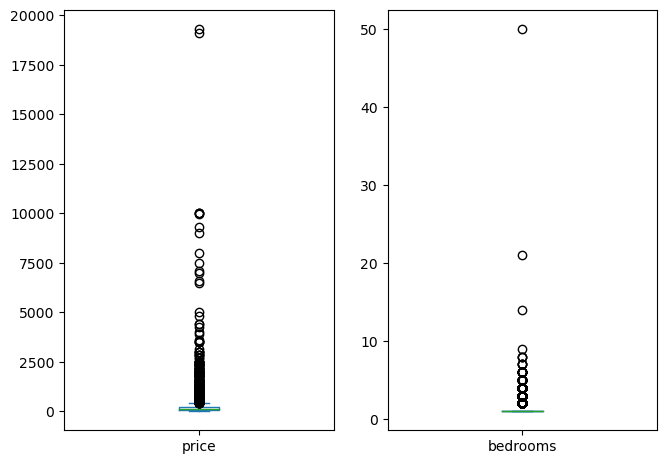

In [231]:
# df_numerics stores only numeric variables from df
df_merged['price'] = pd.to_numeric(df_merged['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False))
df_numerics = df_merged[["price", "bedrooms"]]

df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(16, 12))
plt.show()

In [232]:
num_bedrooms = 5
100 * df_merged[df_merged['bedrooms'] > num_bedrooms].count()['bedrooms'] / df_merged.shape[0]

0.2500431108811864

In [233]:
# Three variables to drop outliers
to_resolve = ["price", "bedrooms"]
quatiles = df_merged[to_resolve].quantile([.25, .75])

quatiles
# # # Calculate boundaries
iqrs = quatiles.loc[0.75] - quatiles.loc[0.25]   # Inter-Quatile Range
iqrs_scale = {
    "price": 3,
    "bedrooms": 15
}
iqrs_scale

boundaries = pd.DataFrame({
    "lower": [quatiles.loc[0.25][var] - iqrs_scale[var] * iqrs[var] for var in to_resolve],
    "upper": [quatiles.loc[0.75][var] + iqrs_scale[var] * iqrs[var] for var in to_resolve]
},
index=['price','bedrooms'])

boundaries.iloc[1] = [1, 5]
boundaries

,lower,upper
price,-353.0,655.0
bedrooms,1.0,5.0


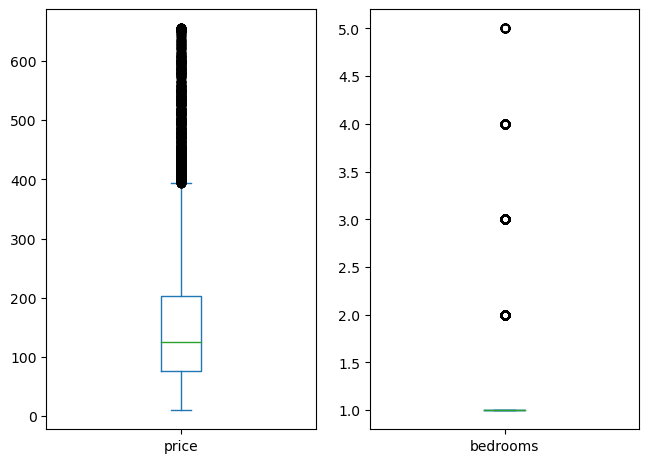

In [234]:
# Drop rows that are out of the boundary
for col_name in to_resolve:
    index_names = df_merged[(df_merged[col_name] < boundaries.at[col_name, "lower"]) | 
                     (df_merged[col_name] > boundaries.at[col_name, "upper"])].index
    df_merged.drop(index_names, inplace=True)
df_merged[to_resolve].plot(kind='box',  subplots=True, layout=(2, 4), figsize=(16, 12))
plt.show()

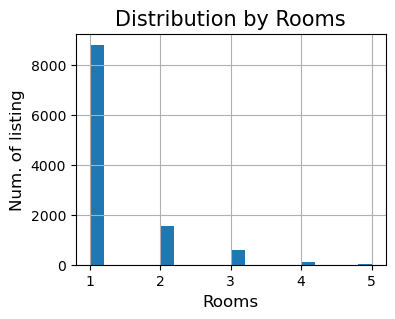

In [235]:
# Draw a histogram of `Rooms`
plt.figure(figsize=(4,3))
plt.title("Distribution by Rooms", fontsize=15)
plt.xlabel("Rooms", fontsize=12)
plt.ylabel("Num. of listing", fontsize=12)
df_merged["bedrooms"].hist(bins=20)
plt.show()

# Tokenising amenities

### Creating keywords df

In [236]:
df_merged['amenities'] = df_merged['amenities'].str.lower()
amenities_df = pd.DataFrame(data=df_merged['amenities'])
print(amenities_df.shape)
amenities_df.head(1)

(11123, 1)


,amenities
0,"[""heating"", ""wifi"", ""kitchen"", ""essentials"", ""..."


In [237]:
# Iterate through df to find every unique keyword (amenities)
keywords = []
# Iterate through each row and update the keywords list
for index, row in amenities_df.iterrows():
    amenities = row['amenities']
    curr_list = amenities.replace('[', '').replace(']', '').replace('\"','').replace('\'','').split(',')
    if isinstance(curr_list, list):
        curr_list = [word.strip() for word in curr_list]
        for amenity in curr_list:
            if amenity not in keywords:
                keywords.append(amenity)
print(len(keywords))
print(keywords)

2475
['heating', 'wifi', 'kitchen', 'essentials', 'lockbox', 'air conditioning', 'self check-in', 'shampoo', 'smoke alarm', 'hair dryer', 'hangers', 'extra pillows and blankets', 'refrigerator', 'tv', 'iron', 'carbon monoxide alarm', 'cleaning products', 'dedicated workspace', 'long term stays allowed', 'bathtub', 'hot water', 'laundromat nearby', 'stove', 'bed linens', 'paid parking lot off premises', 'cooking basics', 'dishes and silverware', 'body soap', 'ethernet connection', 'conditioner', 'clothing storage: closet', 'oven', 'outdoor furniture', 'shower gel', 'dryer', 'washer', 'elevator', 'private entrance', 'luggage dropoff allowed', 'garden view', 'ceiling fan', 'children\\u2019s books and toys', 'mini fridge', 'free street parking', 'tv with standard cable', 'coffee maker: keurig coffee machine', 'hot water kettle', 'microwave', 'cleaning available during stay', 'safe', 'first aid kit', 'sansum stove', 'lock on bedroom door', 'coffee maker: drip coffee maker', 'books and readi

In [238]:
# Go through df to count num of occurences for each keyword
result_list = []
criteria = amenities_df.shape[0] / 10

# Iterate through the keywords
for specific_word in keywords:
    result = int(amenities_df[amenities_df['amenities'].apply(lambda amenities: specific_word in amenities)].count()['amenities'])
    if result > criteria:
        # Append the result as a dictionary to the list
        result_list.append({'keyword': specific_word, 'count': result})

# Create a DataFrame from the list of dictionaries
keyword_df = pd.DataFrame(result_list)
keyword_df = keyword_df.sort_values(by=['count'], ascending=False)
# Display the resulting DataFrame
keyword_df

,keyword,count
68,,11123
1,wifi,10909
2,kitchen,9971
8,smoke alarm,9879
0,heating,9832
...,...,...
69,gas,1229
51,gym,1195
62,gas stove,1188
56,central heating,1179


### Creating one hot encoding of amenities into merged_df

In [239]:
impt_cols = ['wifi',
        'smoke alarm',
        'heating',
        'kitchen',
        'tv',
        'dryer',
        'air conditioning',
        'hot water',
        'iron',
        'refrigerator',
        'shampoo',
        'coffee',
        'washer',
        'dedicated workspace',
        'oven',
        'fire extinguisher',
        'self check-in',
        'first aid kit',
        'free street parking',
        'extra pillows and blankets',
        'bathtub',
        'pets allowed',
        'gym']
important_kw_df = keyword_df[keyword_df['keyword'].isin(impt_cols)]
important_kw_df

,keyword,count
1,wifi,10909
2,kitchen,9971
8,smoke alarm,9879
0,heating,9832
13,tv,8605
5,air conditioning,8109
31,dryer,8080
20,hot water,7146
14,iron,6822
7,shampoo,6564


In [240]:
important_kw_df.to_csv('keywords_df.csv', index=False)

In [241]:
important_kws = important_kw_df['keyword']

encoded_amenities_df = df_merged.copy()
for impt_kw in important_kws:
    encoded_amenities_df[impt_kw] = encoded_amenities_df['amenities'].apply(lambda amenities: impt_kw in amenities)
encoded_amenities_df = encoded_amenities_df.replace({True: 1, False: 0})
encoded_amenities_df

,id,name,host_id,latitude,longitude,property_type,picture_url,room_type,accommodates,bedrooms,...,oven,fire extinguisher,dedicated workspace,self check-in,first aid kit,free street parking,extra pillows and blankets,bathtub,pets allowed,gym
0,16650612,Rental unit in New York · ★4.83 · Studio · 1 b...,24805629,40.76283,-73.987180,Entire rental unit,https://a0.muscache.com/pictures/99ebfaf5-92cf...,Entire home/apt,2,1.0,...,0,0,0,1,0,0,0,0,0,0
1,53892466,Loft in Brooklyn · ★4.67 · 1 bedroom · 1 bed ·...,436547566,40.71152,-73.937140,Entire loft,https://a0.muscache.com/pictures/miso/Hosting-...,Entire home/apt,2,1.0,...,1,0,1,1,0,0,1,1,0,0
2,4047751,Rental unit in New York · 1 bedroom · 1 bed · ...,16325217,40.79053,-73.976150,Entire rental unit,https://a0.muscache.com/pictures/53566637/a3cf...,Entire home/apt,2,1.0,...,0,0,0,0,0,0,0,0,0,0
3,18251681,Home in Brooklyn · ★4.84 · 2 bedrooms · 2 beds...,22769654,40.69348,-73.967820,Entire home,https://a0.muscache.com/pictures/miso/Hosting-...,Entire home/apt,4,2.0,...,0,0,1,1,0,1,0,1,0,0
4,42672172,Rental unit in New York · ★4.48 · 1 bedroom · ...,339778197,40.73412,-73.988620,Private room in rental unit,https://a0.muscache.com/pictures/ef1b34b0-453b...,Private room,2,1.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11830,24040279,Rental unit in Brooklyn · ★4.83 · 1 bedroom · ...,4365496,40.70984,-73.962470,Private room in rental unit,https://a0.muscache.com/pictures/9b272078-3343...,Private room,2,1.0,...,1,0,0,1,1,1,0,1,0,0
11831,26304163,Townhouse in Brooklyn · ★5.0 · 2 bedrooms · 4 ...,65672074,40.66607,-73.989310,Entire townhouse,https://a0.muscache.com/pictures/b0098901-0c94...,Entire home/apt,4,2.0,...,1,1,0,0,1,1,1,1,0,0
11832,19891485,Rental unit in New York · ★4.83 · 1 bedroom · ...,10677720,40.71872,-73.981740,Private room in rental unit,https://a0.muscache.com/pictures/c21504a0-b4d8...,Private room,2,1.0,...,1,0,0,1,1,1,0,0,0,0
11834,824002783527215478,Rental unit in New York · 2 bedrooms · 2 beds ...,424296351,40.76149,-73.960632,Entire rental unit,https://a0.muscache.com/pictures/miso/Hosting-...,Entire home/apt,4,2.0,...,1,0,1,0,0,0,0,1,1,0


In [242]:
# Ensure all columns are encoded properly
(encoded_amenities_df.iloc[:,20:].describe().loc['mean'] == 0).sum()

0

In [243]:
encoded_amenities_df['amenities_count'] = encoded_amenities_df[important_kws].sum(axis=1)
encoded_amenities_df['amenities_count']

0         8
1        15
2         9
3        14
4        10
         ..
11830    17
11831    19
11832    17
11834    14
11835     7
Name: amenities_count, Length: 11123, dtype: int64

In [244]:
columns_to_drop = ['amenities']
encoded_amenities_df = encoded_amenities_df.drop(columns=columns_to_drop)

In [245]:
encoded_amenities_df.shape

(11123, 44)

# Read and merge other datasets

In [246]:
subway_df = pd.read_csv("./clean_New_York_Subway_Stations.csv")
subway_df.head()

,OBJECTID,NAME,LINE,NOTES,long,lat
0,1,Astor Pl,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-73.991070,40.730054
1,2,Canal St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-74.000193,40.718803
2,3,50th St,1-2,"1-all times, 2-nights",-73.983849,40.761728
3,4,Bergen St,2-3-4,"4-nights, 3-all other times, 2-all times",-73.974999,40.680862
4,5,Pennsylvania Ave,3-4,"4-nights, 3-all other times",-73.894886,40.664714


In [247]:
tourist_df = pd.read_csv("./Geocoded_New_York_Tourist_Locations.csv")
tourist_df.head()

,Tourist_Spot,Address,Zipcode,latitude,longitude
0,47th Street - The Diamond District,"47th St. betw. Fifth & Sixth Aves. Manhattan, ...",10036,40.760262,-73.993287
1,9/11 Memorial & Museum,World Trade Center (museum: 180 Greenwich St.)...,10007,40.713649,-74.008713
2,Abyssinian Baptist Church,"132 Odell Clark Place New York, NY 10030, Harlem",10030,40.817341,-73.943330
3,Alice Austen House Museum,"2 Hylan Blvd. Staten Island, NY 10305, Staten ...",10305,40.594406,-74.071136
4,Alice Tully Hall,"1941 Broadway Manhattan, NY 10023, Upper West ...",10023,40.776906,-73.980064


In [248]:
# Define a function to calculate haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    return distance

# Create a DataFrame to store the counts of nearby subways
subway_counts = []
tourist_count = []

count = 0;
for house_index, house_row in encoded_amenities_df.iterrows():
    house_lat, house_lon = house_row['latitude'], house_row['longitude']
    nearby_subways = 0
    nearby_tourist = 0
    
    for subway_index, subway_row in subway_df.iterrows():
        subway_lat, subway_lon = subway_row['lat'], subway_row['long']
        distance = haversine(house_lat, house_lon, subway_lat, subway_lon)
        
        if distance <= 1:
            nearby_subways += 1
            
    for tour_index, tour_row in tourist_df.iterrows():
        subway_lat, subway_lon = tour_row['latitude'], tour_row['longitude']
        distance = haversine(house_lat, house_lon, subway_lat, subway_lon)
        
        if distance <= 1.0:
            nearby_tourist += 1
            
    subway_counts.append(nearby_subways)        
    tourist_count.append(nearby_tourist)


In [249]:
encoded_amenities_df['nearby_subway'] = subway_counts
encoded_amenities_df['nearby_tourist'] = tourist_count

In [250]:
encoded_amenities_df.shape
# Loop through rows and replace values
for index, row in encoded_amenities_df.iterrows():
    if row['review_scores_rating'] == "No reviews":
        encoded_amenities_df.at[index, 'review_scores_rating'] = 0
        
encoded_amenities_df['host_response_rate'].fillna("0%", inplace=True)
encoded_amenities_df['host_response_time'].fillna("never", inplace=True)

In [251]:
# Calculate missing percentage
n_rows, n_cols = encoded_amenities_df.shape
print("%-25s%s" % ("Variable Name", "Missing Percentage"))
print("-" * 43)
print(100 - 100 * encoded_amenities_df.count() / n_rows)

Variable Name            Missing Percentage
-------------------------------------------
id                            0.0
name                          0.0
host_id                       0.0
latitude                      0.0
longitude                     0.0
property_type                 0.0
picture_url                   0.0
room_type                     0.0
accommodates                  0.0
bedrooms                      0.0
beds                          0.0
price                         0.0
number_of_reviews             0.0
review_scores_rating          0.0
host_identity_verified        0.0
host_is_superhost             0.0
host_response_rate            0.0
host_response_time            0.0
city                          0.0
bathrooms                     0.0
wifi                          0.0
kitchen                       0.0
smoke alarm                   0.0
heating                       0.0
tv                            0.0
air conditioning              0.0
dryer                       

In [252]:
encoded_amenities_df.to_csv("./clean_data_with_kw.csv", index=False)

In [254]:
# ! pip3 install geopandas shapely

In [255]:
# import geopandas as gpd

# gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'
# gpd.io.file.fiona.drvsupport.supported_drivers['SHP'] = 'rw'

# # Load county boundary data
# counties = gpd.read_file('./tl_2019_us_county.shp')

# from shapely.geometry import Point

# def get_county(longitude, latitude, counties):
#     point = Point(longitude, latitude)
#     for idx, county in counties.iterrows():
#         if point.within(county['geometry']):
#             return county['NAME']  # Assuming 'NAME' is the column containing county names
#     return 'Not Found'

# longitude = -73.99106999861966
# latitude = 40.73005400028978

# county = get_county(longitude, latitude, counties)
# print(f"The location is in {county} County.")